In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
column_names = ['Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
                'Nonflavanoid phenols','Proanthocyanins' ,'Color intensity','Hue',
               'OD280/OD315 of diluted wines','Proline']
column_names.append('Classification')

data = pd.read_csv("wine.data", names = column_names) 
data

,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Classification
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
data.dtypes

Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
Classification                    int64
dtype: object

In [4]:
data['Classification'].unique()

array([1, 2, 3])

In [5]:
X = data.drop('Classification', axis=1)
y = data['Classification']

In [6]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse=False)
#y = encoder.fit_transform(y.values.reshape(-1,1))

In [7]:
X = np.array(X)
y = np.array(y)

# 10-Fold

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

num = 1
n = 0
precision = []
recall = []
accuracy = []
f1 = []

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[train_idx],
                                                        y[train_idx],
                                                        test_size=0.25,
                                                        random_state=42)
    print(" ")
    print(f"Fold {num}:")
    print("_____________________________________________________________________________________________")
    
    clf = DecisionTreeClassifier(random_state = 42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test, y_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average=None)
    rec = metrics.recall_score(y_test, y_pred,average=None)
    score = metrics.f1_score(y_test, y_pred,average=None)
    
    precision.append(prec)
    recall.append(rec)
    accuracy.append(acc)
    f1.append(score)
    
    print("Accuracy:",acc)
    print("y_true:", y_score)
    
    
    print(metrics.classification_report(y_test, y_pred))
    
    num = num+1
train_index = train_idx
test_index = test_idx

 
Fold 1:
_____________________________________________________________________________________________
Accuracy: 0.875
y_true: 0.875
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.78      0.85        18
           3       0.73      1.00      0.84         8

    accuracy                           0.88        40
   macro avg       0.86      0.90      0.87        40
weighted avg       0.89      0.88      0.88        40

 
Fold 2:
_____________________________________________________________________________________________
Accuracy: 0.975
y_true: 0.975
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        18
           3       0.89      1.00      0.94         8

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98  

In [9]:
avg_precision = np.sum(precision, axis=0)/len(precision)
avg_accuracy = np.sum(accuracy, axis=0)/len(accuracy)
avg_recall = np.sum(recall, axis=0)/len(recall)
avg_f1 = np.sum(f1, axis=0)/len(f1)

In [10]:
from statistics import mean
print(f'Average accuracy of 10-folds: {round(avg_accuracy,2)}')
print(f'Average precision of 10-folds: {round(mean(avg_precision), 2)}')
print(f'Average recall of 10-folds: {round(mean(avg_recall), 2)}')
print(f'Average F1 score of 10-folds: {round(mean(avg_f1), 2)}')

Average accuracy of 10-folds: 0.93
Average precision of 10-folds: 0.92
Average recall of 10-folds: 0.94
Average F1 score of 10-folds: 0.92


# Values of final fold values displayed

In [11]:
X_train_final = X[train_index]
y_train_final = y[train_index]
X_test_final = X[test_index]
y_test_final = y[test_index]

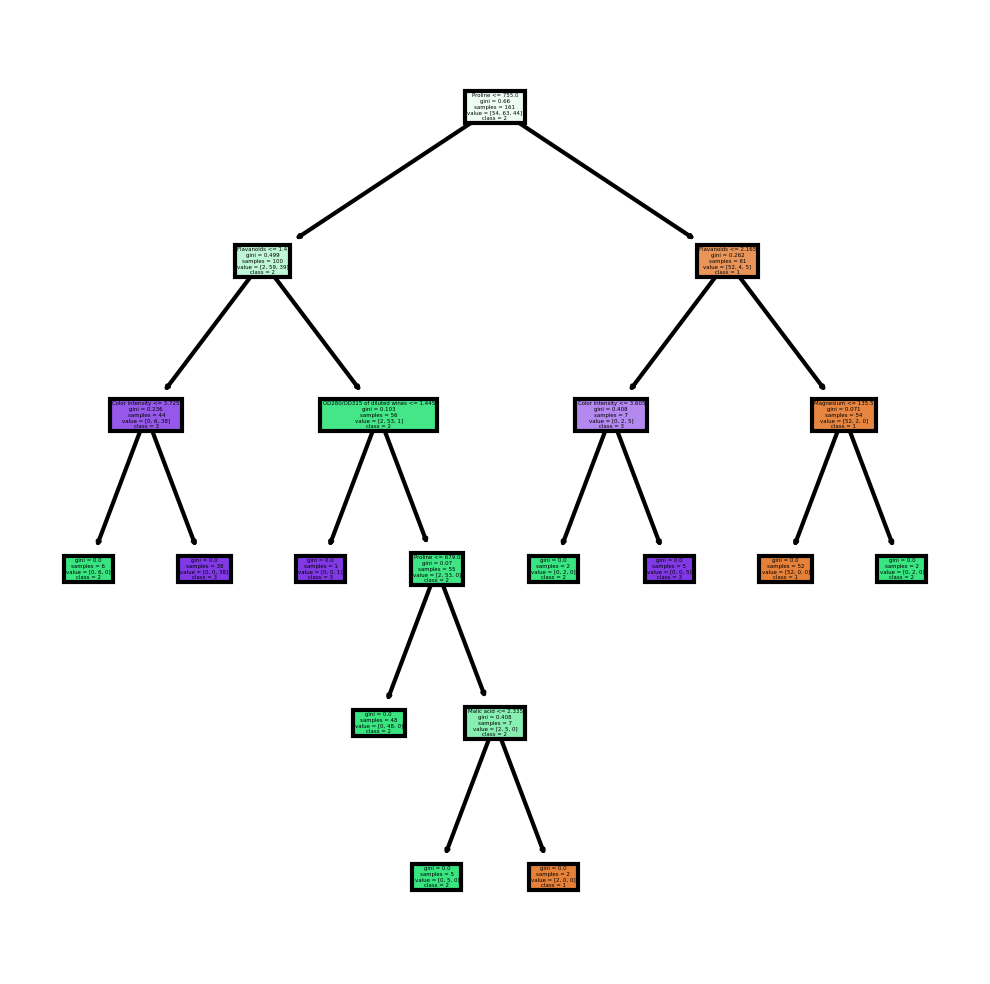

In [12]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_final, y_train_final)
y_pred_final = clf.predict(X_test_final)

fn = column_names
cn = ['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

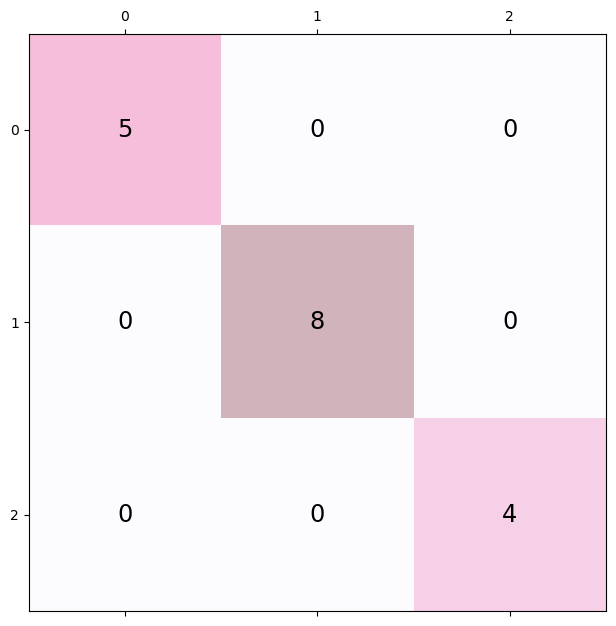

In [13]:
conf_matrix = metrics.confusion_matrix(y_test_final, y_pred_final)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap= 'PuRd', alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')